<a href="https://colab.research.google.com/github/Kankana-7/Flower-Recognition-Using-CNN/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
import keras
from keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/flowers.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


# Model Building

In [ ]:
base_dir = 'flowers'

img_size = 224
batch = 64

In [ ]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
				activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

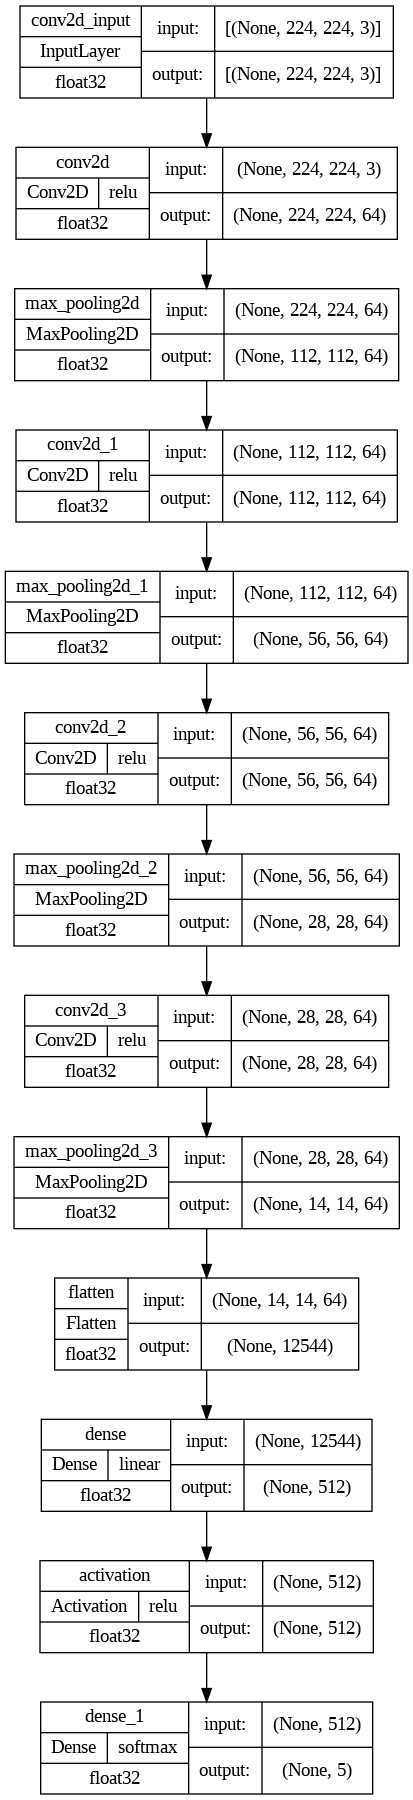

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/30
55/55 [==============================] - 696s 13s/step - loss: 1.5387 - accuracy: 0.3003 - val_loss: 1.2546 - val_accuracy: 0.4349
Epoch 2/30
55/55 [==============================] - 694s 13s/step - loss: 1.1764 - accuracy: 0.5169 - val_loss: 1.2696 - val_accuracy: 0.4942
Epoch 3/30
55/55 [==============================] - 692s 12s/step - loss: 1.0668 - accuracy: 0.5884 - val_loss: 1.0368 - val_accuracy: 0.5895
Epoch 4/30
55/55 [==============================] - 688s 12s/step - loss: 0.9453 - accuracy: 0.6323 - val_loss: 1.0853 - val_accuracy: 0.5558
Epoch 5/30
55/55 [==============================] - 635s 12s/step - loss: 0.9177 - accuracy: 0.6335 - val_loss: 0.8935 - val_accuracy: 0.6465
Epoch 6/30
55/55 [==============================] - 643s 12s/step - loss: 0.8260 - accuracy: 0.6783 - val_loss: 0.9371 - val_accuracy: 0.6442
Epoch 7/30
55/55 [==============================] - 673s 12s/step - loss: 0.7918 - accuracy: 0.6968 - val_loss: 0.8654 - val_accuracy: 0.6640
Epoch 

In [ ]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 441ms/step
[[1. 0. 0. 0. 0.]]
Daisy


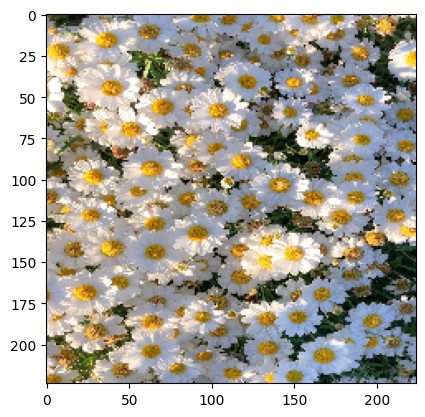

In [ ]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('/content/drive/MyDrive/img1.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
	if(result[0][i]==1):
		print(list_[i])
		break


1/1 [==============================] - 0s 119ms/step
[[0. 1. 0. 0. 0.]]
Danelion


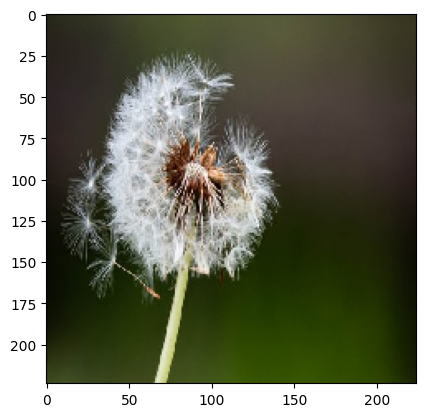

In [ ]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/img2.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
	if(result[0][i]==1):
		print(list_[i])
		break


1/1 [==============================] - 0s 63ms/step
[[0. 0. 1. 0. 0.]]
Rose


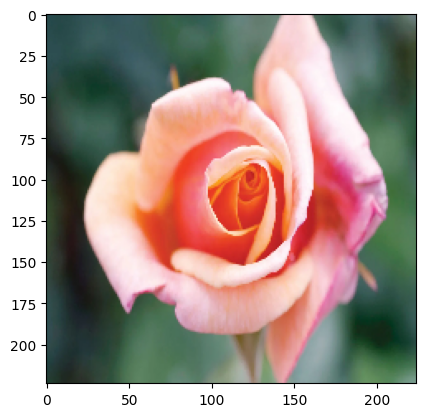

In [ ]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/img3.webp',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
	if(result[0][i]==1):
		print(list_[i])
		break


1/1 [==============================] - 0s 112ms/step
[[0. 0. 0. 1. 0.]]
sunflower


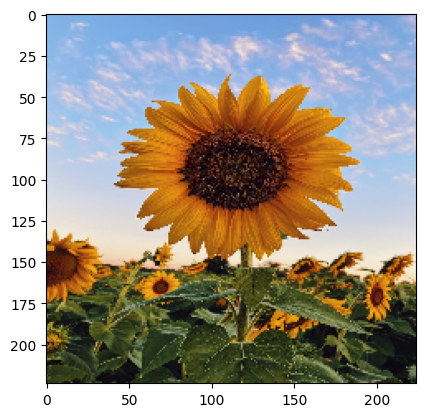

In [ ]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/img4.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
	if(result[0][i]==1):
		print(list_[i])
		break


1/1 [==============================] - 0s 108ms/step
[[0. 0. 0. 0. 1.]]
tulip


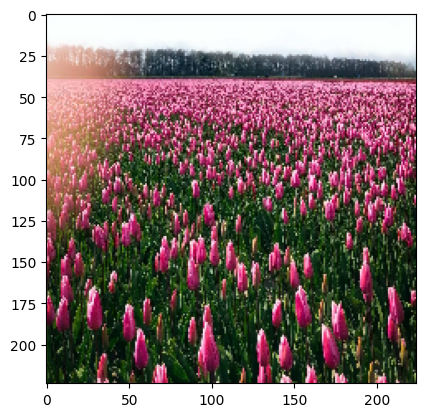

In [ ]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/img5.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
	if(result[0][i]==1):
		print(list_[i])
		break
